# Assignment 8 - Data Analytics I

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("HousingData.csv")

In [3]:
# Features Explanaton

# CRIM: Per capita crime rate by town.
# ZN: Proportion of residential land zoned for lots over 25,000 sq. ft.
# INDUS: Proportion of non-retail business acres per town.
# CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise).
# NOX: Nitric oxides concentration (parts per 10 million).
# RM: Average number of rooms per dwelling.
# AGE: Proportion of owner-occupied units built before 1940.
# DIS: Weighted distances to five Boston employment centers.
# RAD: Index of accessibility to radial highways.
# TAX: Full-value property tax rate per $10,000.
# PTRATIO: Pupil-teacher ratio by town.
# B: 1000(Bk - 0.63)^2 where Bk is the proportion of [people of African American descent] by town.
# LSTAT: Percentage of lower status of the population.
# MEDV: Median value of owner-occupied homes in $1000s.

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
df.shape

(506, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [7]:
df.dropna(inplace=True)
df.shape

(394, 14)

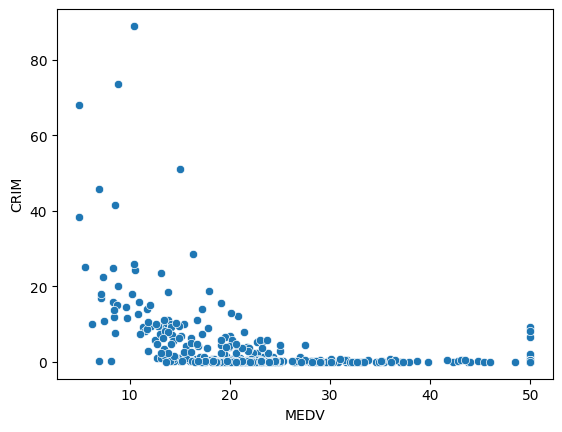

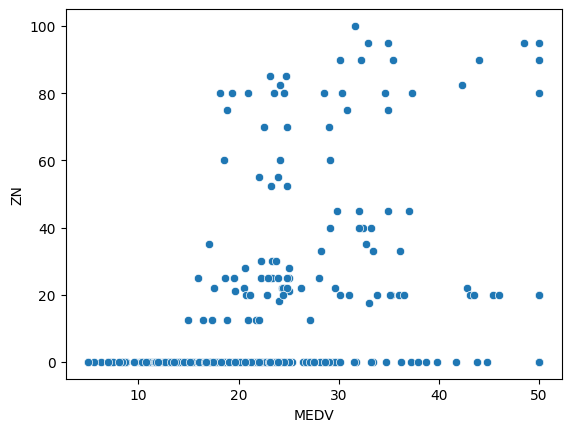

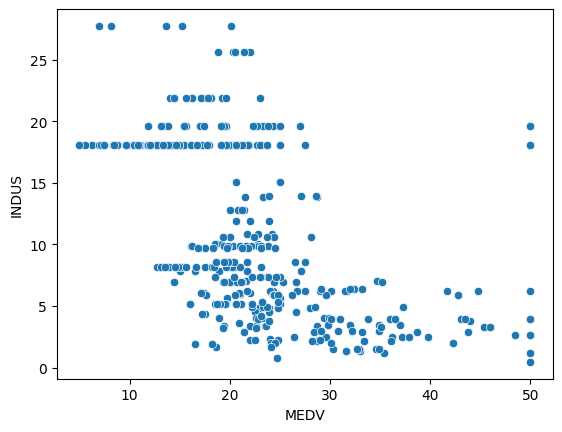

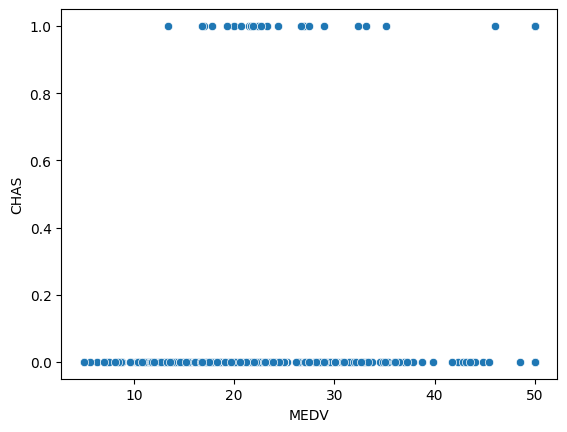

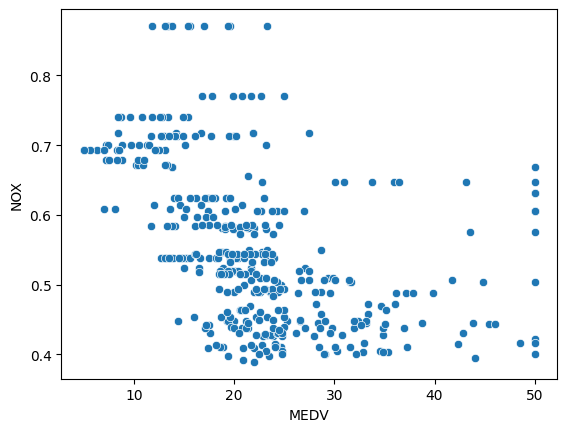

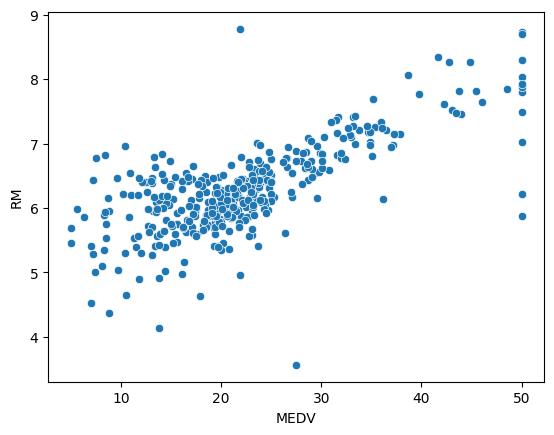

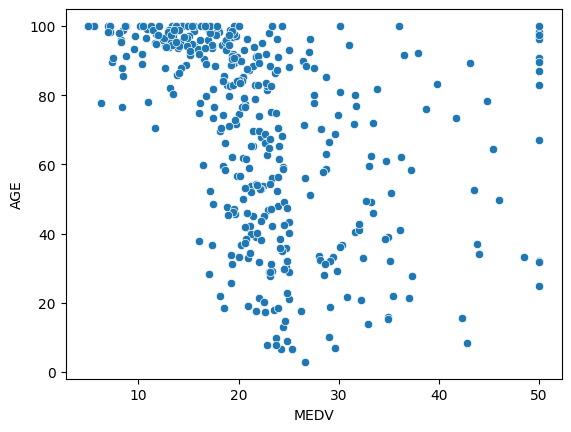

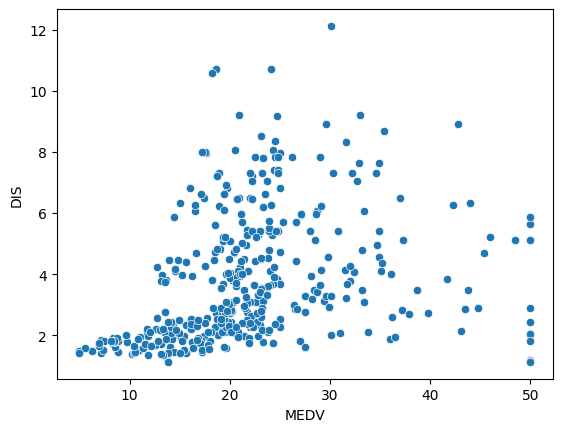

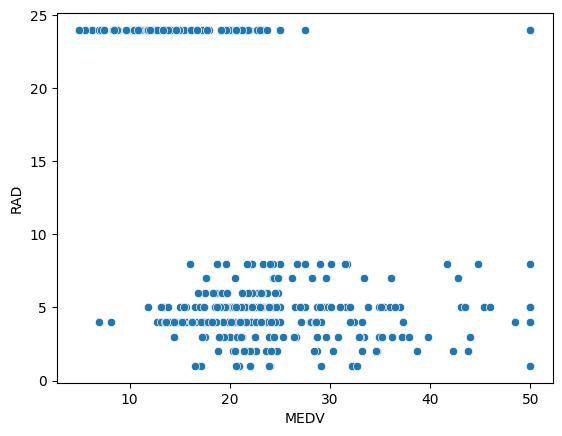

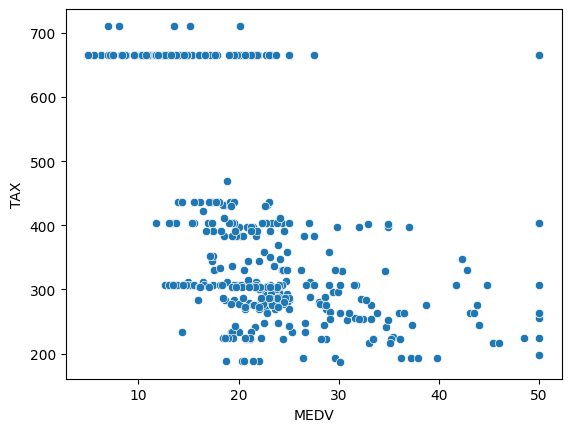

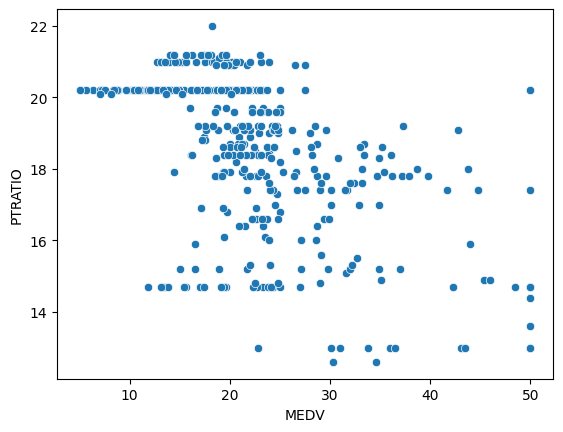

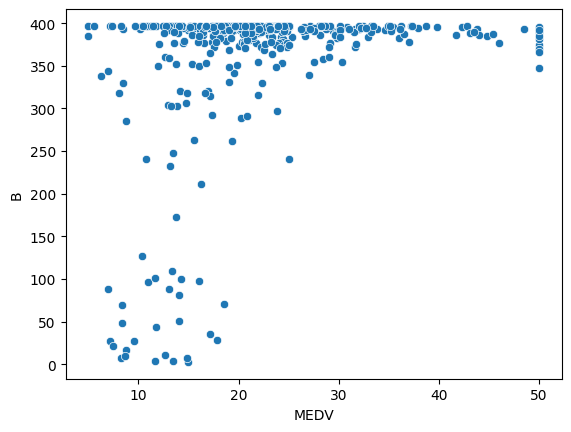

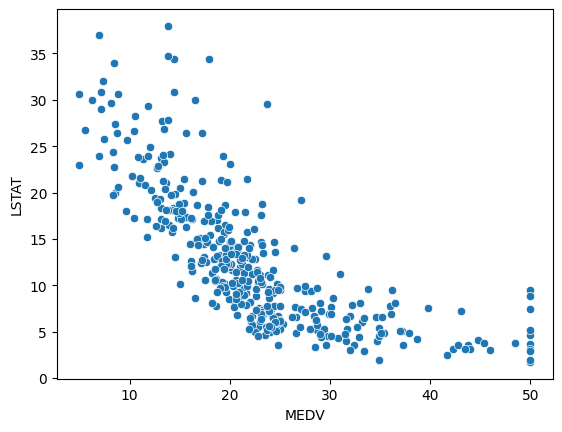

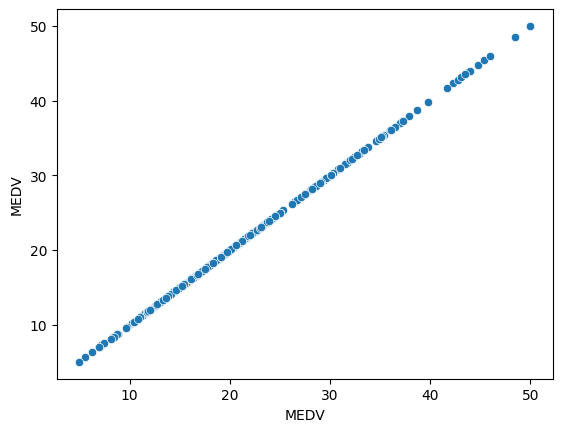

In [8]:
# X (Independent Variable) - Independent variables, also known as predictor variables or features, are the variables that are used to predict or explain the outcome of interest.
# Y (Target Variable or Dependent Variable) - The target variable, is the variable that is being predicted or explained by the independent variables.

# We will be plotting scatter plots and corr matri to determine which valuescan be used as X

for column in df.columns:
    sns.scatterplot(x=df['MEDV'], y=df[column])
    plt.show()

In [9]:
df.corr(method="pearson")["MEDV"]

CRIM      -0.397230
ZN         0.406822
INDUS     -0.510829
CHAS       0.173701
NOX       -0.459054
RM         0.723951
AGE       -0.407470
DIS        0.279547
RAD       -0.416638
TAX       -0.508864
PTRATIO   -0.543809
B          0.347256
LSTAT     -0.743450
MEDV       1.000000
Name: MEDV, dtype: float64

In [23]:
X = df[['INDUS', 'TAX', 'NOX', 'RM', 'RAD', 'PTRATIO', 'LSTAT']]
Y = df[['MEDV']]

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [25]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [26]:
Y_pred = lr.predict(X_test)

In [33]:
lr.score(X_test, Y_test)*100

55.85135307127926

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
print("Mean Squared Error : ", mse)
print("Mean Absolute Error : ", mae)

Mean Squared Error :  37.23780548166325
Mean Absolute Error :  3.6567654820796855


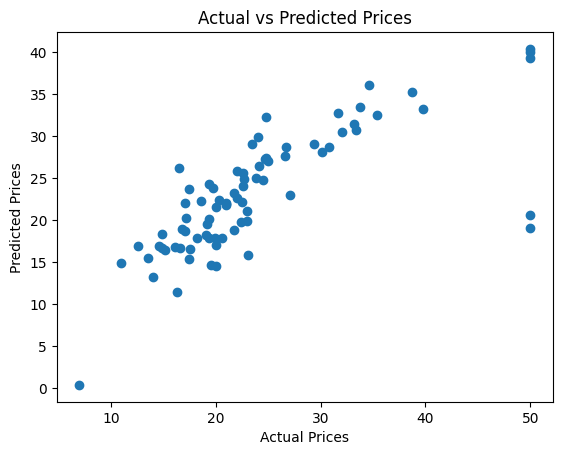

In [29]:
plt.scatter(Y_test, Y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()